<a href="https://colab.research.google.com/github/ohiju/Machine_Learning_College_Projects/blob/main/ch05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.967032967032967


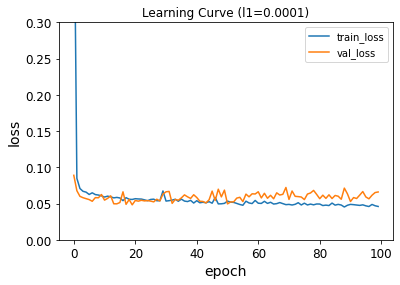

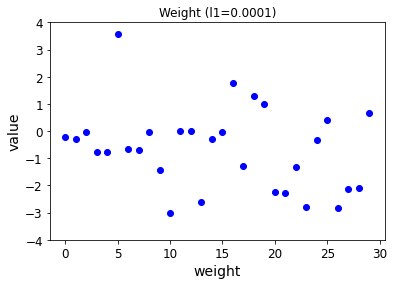

0.967032967032967


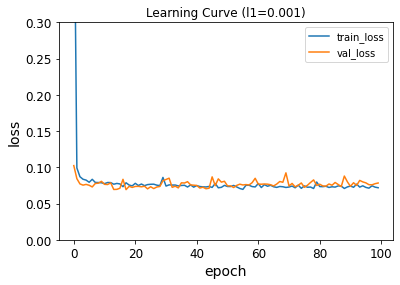

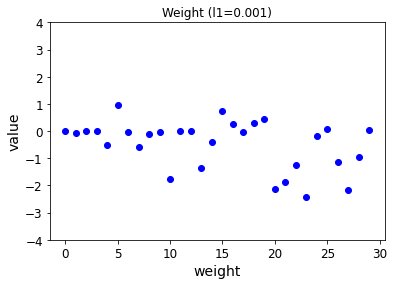

0.9560439560439561


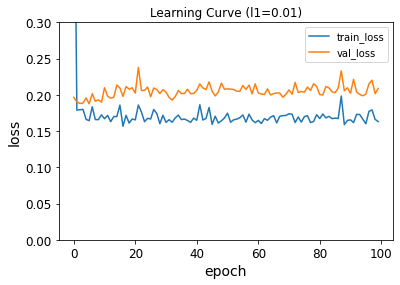

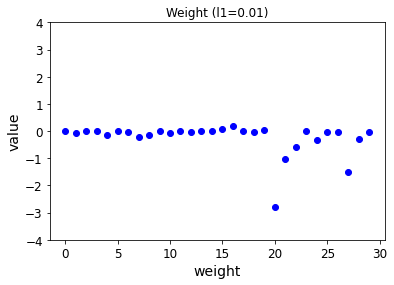

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train-train_mean)/train_std
x_val_scaled = (x_val-train_mean)/train_std
x_test_scaled = (x_test-train_mean)/train_std

class SingleLayer:
    def __init__(self, learning_rate = 0.1, l1 = 0.0, l2 = 0.0):
        self.w = None
        self.b = None
        self.eta = learning_rate
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.b_history = []
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.dot(x , self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x_k, err_k):
        w_grad_k = x_k * err_k    # 가중치에 대한 그래디언트를 계산합니다
        b_grad_k = 1 * err_k    # 절편에 대한 그래디언트를 계산합니다
        return w_grad_k, b_grad_k

    def activation(self, z_k):
        z_k = np.clip(z_k, -100, None) # 안전한 np.exp() 계산을 위해
        a_k = 1.0 / (1.0 + np.exp(-z_k))  # 시그모이드 계산
        return a_k
        
    def fit(self, x, y, epochs=100, x_val = None, y_val = None):
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
        self.b = 0.0                        # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())
        self.b_history.append(self.b)
        np.random.seed(42)

        for i in range(epochs):           # epochs만큼 반복합니다
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))

            for k in indexes:    # 모든 샘플에 대해 반복합니다
                z_k = self.forpass(x[k])     # 정방향 계산
                a_k = self.activation(z_k)    # 활성화 함수 적용
                err_k = -(y[k] - a_k)          # 오차 계산
                w_grad_k, b_grad_k = self.backprop(x[k], err_k) # 역방향 계산
                w_grad_k += self.l1*np.sign(self.w) + self.l2*self.w
                self.w -= self.eta*w_grad_k
                self.b -= self.eta*b_grad_k
                a_k = np.clip(a_k, 1.0e-10, 1.0-1.0e-10)
                loss += -y[k]*np.log(a_k)-(1.0-y[k])*np.log(1.0-a_k)

            self.losses.append(loss/x.shape[0] + self.reg_loss())
            self.update_val_loss(x_val,y_val)
            self.w_history.append(self.w.copy())
            self.b_history.append(self.b)
    
    def reg_loss(self):
        return self.l1*np.sum(np.abs(self.w)) + 0.5*self.l2*np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1.0e-10, 1.0-1.0e-10)
            val_loss -= y_val[i]*np.log(a) + (1.0-y_val[i])*np.log(1-a)
        self.val_losses.append(val_loss/len(y_val)+self.reg_loss())

    def predict(self, x):
        z = [self.forpass(x_k) for x_k in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a > 0.5
    
    def score(self, x, y):
        return np.mean(self.predict(x)==y)

l1_list = [0.0001, 0.001, 0.01]

for l in l1_list:
    lyr = SingleLayer(l1=l)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    print(lyr.score(x_val_scaled, y_val))    

    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()


0.0001 0.967032967032967


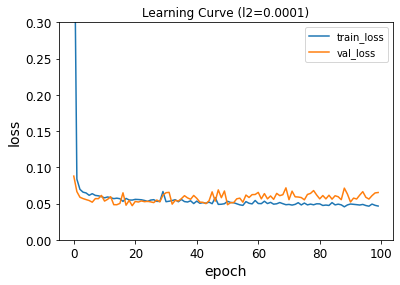

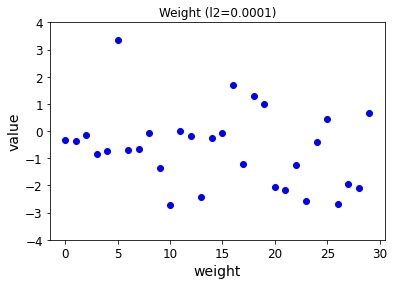

0.001 0.978021978021978


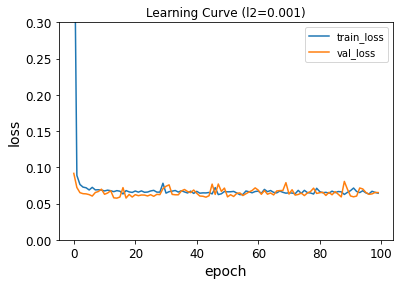

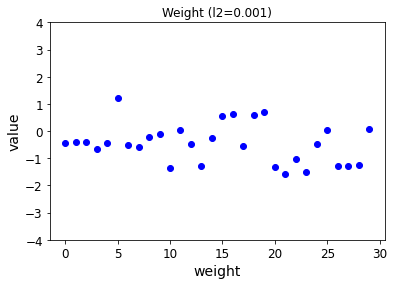

0.01 0.978021978021978


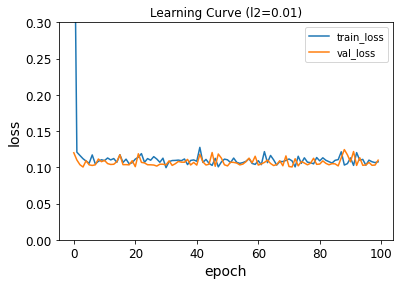

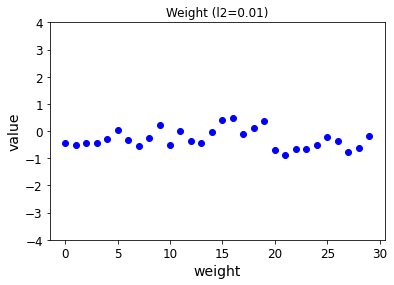

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train-train_mean)/train_std
x_val_scaled = (x_val-train_mean)/train_std
x_test_scaled = (x_test-train_mean)/train_std

class SingleLayer:
    def __init__(self, learning_rate = 0.1, l1 = 0.0, l2 = 0.0):
        self.w = None
        self.b = None
        self.eta = learning_rate
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.b_history = []
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.dot(x , self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x_k, err_k):
        w_grad_k = x_k * err_k    # 가중치에 대한 그래디언트를 계산합니다
        b_grad_k = 1 * err_k    # 절편에 대한 그래디언트를 계산합니다
        return w_grad_k, b_grad_k

    def activation(self, z_k):
        z_k = np.clip(z_k, -100, None) # 안전한 np.exp() 계산을 위해
        a_k = 1.0 / (1.0 + np.exp(-z_k))  # 시그모이드 계산
        return a_k
        
    def fit(self, x, y, epochs=100, x_val = None, y_val = None):
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
        self.b = 0.0                        # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())
        self.b_history.append(self.b)
        np.random.seed(42)

        for i in range(epochs):           # epochs만큼 반복합니다
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))

            for k in indexes:    # 모든 샘플에 대해 반복합니다
                z_k = self.forpass(x[k])     # 정방향 계산
                a_k = self.activation(z_k)    # 활성화 함수 적용
                err_k = -(y[k] - a_k)          # 오차 계산
                w_grad_k, b_grad_k = self.backprop(x[k], err_k) # 역방향 계산
                w_grad_k += self.l1*np.sign(self.w) + self.l2*self.w
                self.w -= self.eta*w_grad_k
                self.b -= self.eta*b_grad_k
                a_k = np.clip(a_k, 1.0e-10, 1.0-1.0e-10)
                loss += -y[k]*np.log(a_k)-(1.0-y[k])*np.log(1.0-a_k)

            self.losses.append(loss/x.shape[0] + self.reg_loss())
            self.update_val_loss(x_val,y_val)
            self.w_history.append(self.w.copy())
            self.b_history.append(self.b)
    
    def reg_loss(self):
        return self.l1*np.sum(np.abs(self.w)) + 0.5*self.l2*np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1.0e-10, 1.0-1.0e-10)
            val_loss -= y_val[i]*np.log(a) + (1.0-y_val[i])*np.log(1-a)
        self.val_losses.append(val_loss/len(y_val)+self.reg_loss())

    def predict(self, x):
        z = [self.forpass(x_k) for x_k in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a > 0.5
    
    def score(self, x, y):
        return np.mean(self.predict(x)==y)

l2_list = [0.0001, 0.001, 0.01]

for l in l2_list:
    lyr = SingleLayer(l2=l)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    print(l, lyr.score(x_val_scaled, y_val))

    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train-train_mean)/train_std
x_val_scaled = (x_val-train_mean)/train_std
x_test_scaled = (x_test-train_mean)/train_std

class SingleLayer:
    def __init__(self, learning_rate = 0.1, l1 = 0.0, l2 = 0.0):
        self.w = None
        self.b = None
        self.eta = learning_rate
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.b_history = []
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.dot(x , self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x_k, err_k):
        w_grad_k = x_k * err_k    # 가중치에 대한 그래디언트를 계산합니다
        b_grad_k = 1 * err_k    # 절편에 대한 그래디언트를 계산합니다
        return w_grad_k, b_grad_k

    def activation(self, z_k):
        z_k = np.clip(z_k, -100, None) # 안전한 np.exp() 계산을 위해
        a_k = 1.0 / (1.0 + np.exp(-z_k))  # 시그모이드 계산
        return a_k
        
    def fit(self, x, y, epochs=100, x_val = None, y_val = None):
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
        self.b = 0.0                        # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())
        self.b_history.append(self.b)
        np.random.seed(42)

        for i in range(epochs):           # epochs만큼 반복합니다
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))

            for k in indexes:    # 모든 샘플에 대해 반복합니다
                z_k = self.forpass(x[k])     # 정방향 계산
                a_k = self.activation(z_k)    # 활성화 함수 적용
                err_k = -(y[k] - a_k)          # 오차 계산
                w_grad_k, b_grad_k = self.backprop(x[k], err_k) # 역방향 계산
                w_grad_k += self.l1*np.sign(self.w) + self.l2*self.w
                self.w -= self.eta*w_grad_k
                self.b -= self.eta*b_grad_k
                a_k = np.clip(a_k, 1.0e-10, 1.0-1.0e-10)
                loss += -y[k]*np.log(a_k)-(1.0-y[k])*np.log(1.0-a_k)

            self.losses.append(loss/x.shape[0] + self.reg_loss())
            self.update_val_loss(x_val,y_val)
            self.w_history.append(self.w.copy())
            self.b_history.append(self.b)
    
    def reg_loss(self):
        return self.l1*np.sum(np.abs(self.w)) + 0.5*self.l2*np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1.0e-10, 1.0-1.0e-10)
            val_loss -= y_val[i]*np.log(a) + (1.0-y_val[i])*np.log(1-a)
        self.val_losses.append(val_loss/len(y_val)+self.reg_loss())

    def predict(self, x):
        z = [self.forpass(x_k) for x_k in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a > 0.5
    
    def score(self, x, y):
        return np.mean(self.predict(x)==y)

k = 10
bins = len(x_train_all) // k


l1_list = [0.0001, 0.001, 0.01]

for l in l1_list:
    validation_scores = []
    for i in range(k):
        start = i*bins
        end = (i+1)*bins
        val_fold = x_train_all[start:end]
        val_target = y_train_all[start:end]
        
        train_index = list(range(0, start))+list(range(end, len(x_train)))
        train_fold = x_train_all[train_index]
        train_target = y_train_all[train_index]
        
        train_mean = np.mean(train_fold, axis=0)
        train_std = np.std(train_fold, axis=0)
        train_fold_scaled = (train_fold - train_mean) / train_std
        val_fold_scaled = (val_fold - train_mean) / train_std
        
        lyr = SingleLayer(l1=l)
        lyr.fit(train_fold_scaled, train_target, epochs=50)
        score = lyr.score(val_fold_scaled, val_target)
        validation_scores.append(score)

    print(l, np.mean(validation_scores))

0.0001 0.9666666666666666
0.001 0.9711111111111113
0.01 0.9533333333333334


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train-train_mean)/train_std
x_val_scaled = (x_val-train_mean)/train_std
x_test_scaled = (x_test-train_mean)/train_std

class SingleLayer:
    def __init__(self, learning_rate = 0.1, l1 = 0.0, l2 = 0.0):
        self.w = None
        self.b = None
        self.eta = learning_rate
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.b_history = []
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.dot(x , self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x_k, err_k):
        w_grad_k = x_k * err_k    # 가중치에 대한 그래디언트를 계산합니다
        b_grad_k = 1 * err_k    # 절편에 대한 그래디언트를 계산합니다
        return w_grad_k, b_grad_k

    def activation(self, z_k):
        z_k = np.clip(z_k, -100, None) # 안전한 np.exp() 계산을 위해
        a_k = 1.0 / (1.0 + np.exp(-z_k))  # 시그모이드 계산
        return a_k
        
    def fit(self, x, y, epochs=100, x_val = None, y_val = None):
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
        self.b = 0.0                        # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())
        self.b_history.append(self.b)
        np.random.seed(42)

        for i in range(epochs):           # epochs만큼 반복합니다
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))

            for k in indexes:    # 모든 샘플에 대해 반복합니다
                z_k = self.forpass(x[k])     # 정방향 계산
                a_k = self.activation(z_k)    # 활성화 함수 적용
                err_k = -(y[k] - a_k)          # 오차 계산
                w_grad_k, b_grad_k = self.backprop(x[k], err_k) # 역방향 계산
                w_grad_k += self.l1*np.sign(self.w) + self.l2*self.w
                self.w -= self.eta*w_grad_k
                self.b -= self.eta*b_grad_k
                a_k = np.clip(a_k, 1.0e-10, 1.0-1.0e-10)
                loss += -y[k]*np.log(a_k)-(1.0-y[k])*np.log(1.0-a_k)

            self.losses.append(loss/x.shape[0] + self.reg_loss())
            self.update_val_loss(x_val,y_val)
            self.w_history.append(self.w.copy())
            self.b_history.append(self.b)
    
    def reg_loss(self):
        return self.l1*np.sum(np.abs(self.w)) + 0.5*self.l2*np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1.0e-10, 1.0-1.0e-10)
            val_loss -= y_val[i]*np.log(a) + (1.0-y_val[i])*np.log(1-a)
        self.val_losses.append(val_loss/len(y_val)+self.reg_loss())

    def predict(self, x):
        z = [self.forpass(x_k) for x_k in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a > 0.5
    
    def score(self, x, y):
        return np.mean(self.predict(x)==y)

k = 10
bins = len(x_train_all) // k

l2_list = [0.0001, 0.001, 0.01]

for l in l2_list:
    validation_scores = []
    for i in range(k):
        start = i*bins
        end = (i+1)*bins
        val_fold = x_train_all[start:end]
        val_target = y_train_all[start:end]
        
        train_index = list(range(0, start))+list(range(end, len(x_train)))
        train_fold = x_train_all[train_index]
        train_target = y_train_all[train_index]
        
        train_mean = np.mean(train_fold, axis=0)
        train_std = np.std(train_fold, axis=0)
        train_fold_scaled = (train_fold - train_mean) / train_std
        val_fold_scaled = (val_fold - train_mean) / train_std
        
        lyr = SingleLayer(l2=l)
        lyr.fit(train_fold_scaled, train_target, epochs=50)
        score = lyr.score(val_fold_scaled, val_target)
        validation_scores.append(score)

    print(l, np.mean(validation_scores))

0.0001 0.9666666666666666
0.001 0.9688888888888888
0.01 0.9777777777777779


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train-train_mean)/train_std
x_val_scaled = (x_val-train_mean)/train_std
x_test_scaled = (x_test-train_mean)/train_std

class SingleLayer:
    def __init__(self, learning_rate = 0.1, l1 = 0.0, l2 = 0.0):
        self.w = None
        self.b = None
        self.eta = learning_rate
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.b_history = []
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z = np.dot(x , self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x_k, err_k):
        w_grad_k = x_k * err_k    # 가중치에 대한 그래디언트를 계산합니다
        b_grad_k = 1 * err_k    # 절편에 대한 그래디언트를 계산합니다
        return w_grad_k, b_grad_k

    def activation(self, z_k):
        z_k = np.clip(z_k, -100, None) # 안전한 np.exp() 계산을 위해
        a_k = 1.0 / (1.0 + np.exp(-z_k))  # 시그모이드 계산
        return a_k
        
    def fit(self, x, y, epochs=100, x_val = None, y_val = None):
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
        self.b = 0.0                        # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())
        self.b_history.append(self.b)
        np.random.seed(42)

        for i in range(epochs):           # epochs만큼 반복합니다
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))

            for k in indexes:    # 모든 샘플에 대해 반복합니다
                z_k = self.forpass(x[k])     # 정방향 계산
                a_k = self.activation(z_k)    # 활성화 함수 적용
                err_k = -(y[k] - a_k)          # 오차 계산
                w_grad_k, b_grad_k = self.backprop(x[k], err_k) # 역방향 계산
                w_grad_k += self.l1*np.sign(self.w) + self.l2*self.w
                self.w -= self.eta*w_grad_k
                self.b -= self.eta*b_grad_k
                a_k = np.clip(a_k, 1.0e-10, 1.0-1.0e-10)
                loss += -y[k]*np.log(a_k)-(1.0-y[k])*np.log(1.0-a_k)

            self.losses.append(loss/x.shape[0] + self.reg_loss())
            self.update_val_loss(x_val,y_val)
            self.w_history.append(self.w.copy())
            self.b_history.append(self.b)
    
    def reg_loss(self):
        return self.l1*np.sum(np.abs(self.w)) + 0.5*self.l2*np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1.0e-10, 1.0-1.0e-10)
            val_loss -= y_val[i]*np.log(a) + (1.0-y_val[i])*np.log(1-a)
        self.val_losses.append(val_loss/len(y_val)+self.reg_loss())

    def predict(self, x):
        z = [self.forpass(x_k) for x_k in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a > 0.5
    
    def score(self, x, y):
        return np.mean(self.predict(x)==y)

#for l in l1_list:
#    lyr = SingleLayer(l1=l)
#    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
#    print(l, lyr.score(x_val_scaled, y_val))    
#
#    plt.plot(lyr.losses)
#    plt.plot(lyr.val_losses)
#    plt.title('Learning Curve (l1={})'.format(l))
#    plt.ylabel('loss')
#    plt.xlabel('epoch')
#    plt.legend(['train_loss', 'val_loss'])
#    plt.ylim(0, 0.3)
#    plt.show()
#    
#    plt.plot(lyr.w, 'bo')
#    plt.title('Weight (l1={})'.format(l))
#    plt.ylabel('value')
#    plt.xlabel('weight')
#    plt.ylim(-4, 4)
#    plt.show()
#
#l2_list = [0.0001, 0.001, 0.01]
#
#for l in l2_list:
#    lyr = SingleLayer(l2=l)
#    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
#    print(l, lyr.score(x_val_scaled, y_val))
#
#    plt.plot(lyr.losses)
#    plt.plot(lyr.val_losses)
#    plt.title('Learning Curve (l2={})'.format(l))
#    plt.ylabel('loss')
#    plt.xlabel('epoch')
#    plt.legend(['train_loss', 'val_loss'])
#    plt.ylim(0, 0.3)
#    plt.show()
#    
#    plt.plot(lyr.w, 'bo')
#    plt.title('Weight (l2={})'.format(l))
#    plt.ylabel('value')
#    plt.xlabel('weight')
#    plt.ylim(-4, 4)
#    plt.show()
#
k = 10
bins = len(x_train_all) // k

l1_list = [0.0001, 0.001, 0.01]

for l in l1_list:
    validation_scores = []
    for i in range(k):
        start = i*bins
        end = (i+1)*bins
        val_fold = x_train_all[start:end]
        val_target = y_train_all[start:end]
        
        train_index = list(range(0, start))+list(range(end, len(x_train)))
        train_fold = x_train_all[train_index]
        train_target = y_train_all[train_index]
        
        train_mean = np.mean(train_fold, axis=0)
        train_std = np.std(train_fold, axis=0)
        train_fold_scaled = (train_fold - train_mean) / train_std
        val_fold_scaled = (val_fold - train_mean) / train_std
        
        lyr = SingleLayer(l1=l)
        lyr.fit(train_fold_scaled, train_target, epochs=50)
        score = lyr.score(val_fold_scaled, val_target)
        validation_scores.append(score)


l2_list = [0.0001, 0.001, 0.01]

for l in l2_list:
    validation_scores = []
    for i in range(k):
        start = i*bins
        end = (i+1)*bins
        val_fold = x_train_all[start:end]
        val_target = y_train_all[start:end]
        
        train_index = list(range(0, start))+list(range(end, len(x_train)))
        train_fold = x_train_all[train_index]
        train_target = y_train_all[train_index]
        
        train_mean = np.mean(train_fold, axis=0)
        train_std = np.std(train_fold, axis=0)
        train_fold_scaled = (train_fold - train_mean) / train_std
        val_fold_scaled = (val_fold - train_mean) / train_std
        
        lyr = SingleLayer(l2=l)
        lyr.fit(train_fold_scaled, train_target, epochs=50)
        score = lyr.score(val_fold_scaled, val_target)
        validation_scores.append(score)


layer0 = SingleLayer(l1=0.0, l2 = 0.0)
layer0.fit(x_train_scaled, y_train, epochs = 50)
print("l1: {:5.4f}, l2: {:5.4f}, Success Rate: {:5.2f}%".format(layer0.l1, layer0.l2, 100*layer0.score(x_val_scaled, y_val)))

layer1 = SingleLayer(l1=0.001, l2 = 0.0)
layer1.fit(x_train_scaled, y_train, epochs = 50)
print("l1: {:5.4f}, l2: {:5.4f}, Success Rate: {:5.2f}%".format(layer1.l1, layer1.l2, 100*layer1.score(x_val_scaled, y_val)))
layer2 = SingleLayer(l1=0.01, l2 = 0.0)
layer2.fit(x_train_scaled, y_train, epochs = 50)
print("l1: {:5.4f}, l2: {:5.4f}, Success Rate: {:5.2f}%".format(layer2.l1, layer2.l2, 100*layer2.score(x_val_scaled, y_val)))
layer3 = SingleLayer(l1=0.0, l2 = 0.001)
layer3.fit(x_train_scaled, y_train, epochs = 50)
print("l1: {:5.4f}, l2: {:5.4f}, Success Rate: {:5.2f}%".format(layer3.l1, layer3.l2, 100*layer3.score(x_val_scaled, y_val)))
layer4 = SingleLayer(l1=0.0, l2 = 0.01)
layer4.fit(x_train_scaled, y_train, epochs = 50)
print("l1: {:5.4f}, l2: {:5.4f}, Success Rate: {:5.2f}%".format(layer4.l1, layer4.l2, 100*layer4.score(x_val_scaled, y_val)))

l1: 0.0000, l2: 0.0000, Success Rate: 96.70%
l1: 0.0010, l2: 0.0000, Success Rate: 96.70%
l1: 0.0100, l2: 0.0000, Success Rate: 97.80%
l1: 0.0000, l2: 0.0010, Success Rate: 97.80%
l1: 0.0000, l2: 0.0100, Success Rate: 98.90%
